In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(['ls', '../../Data']).decode('utf8'))

SAP.csv
SAP_normal.csv
SAP_numeric.csv



In [58]:
df = pd.read_csv('../../Data/SAP.csv')
df.rename(index=str, columns={'gender':'Gender', 'NationalITy':'Nationality','raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'},inplace=True)

df["Class"][df["Class"] == "L"] = 0
df["Class"][df["Class"] == "M"] = 1
df["Class"][df["Class"] == "H"] = 2
df['Class'] = df['Class'].astype(int)

df['Gender'][df['Gender'] == "F"] = 0
df['Gender'][df['Gender'] == "M"] = 1
df['Gender'] = df['Gender'].astype(int)

df['Relation'][df['Relation'] == "Father"] = 0
df['Relation'][df['Relation'] == "Mum"] = 1
df['Relation'] = df['Relation'].astype(int)

df['StudentAbsenceDays'][df['StudentAbsenceDays'] == "Under-7"] = 0
df['StudentAbsenceDays'][df['StudentAbsenceDays'] == "Above-7"] = 1
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].astype(int)

df['ParentschoolSatisfaction'][df['ParentschoolSatisfaction'] == "Good"] = 0
df['ParentschoolSatisfaction'][df['ParentschoolSatisfaction'] == "Bad"] = 1
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].astype(int)

df['ParentAnsweringSurvey'][df['ParentAnsweringSurvey'] == "No"] = 0
df['ParentAnsweringSurvey'][df['ParentAnsweringSurvey'] == "Yes"] = 1
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].astype(int)

/home/galiold/Projects/University/Datamining-Fall2019/FirstPhase/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/galiold/Projects/University/Datamining-Fall2019/FirstPhase/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/galiold/Projects/University/Datamining-Fall2019/FirstPhase/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [59]:
df.head()

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,15,16,2,20,1,0,0,1
1,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,20,20,3,25,1,0,0,1
2,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,10,7,0,30,0,1,1,0
3,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,30,25,5,35,0,1,1,0
4,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,40,50,12,50,0,1,1,1


In [60]:
from sklearn.model_selection import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = df.sample(frac=0.7, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = df.loc[~df.index.isin(train.index)]

print(train.shape)
print(test.shape)

(336, 17)
(144, 17)


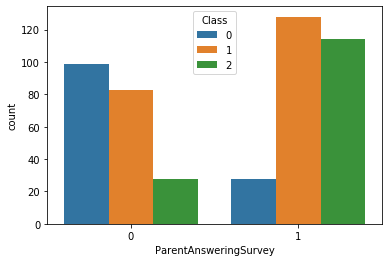

In [61]:
sns.countplot(x=df.ParentAnsweringSurvey, hue=df.Class)

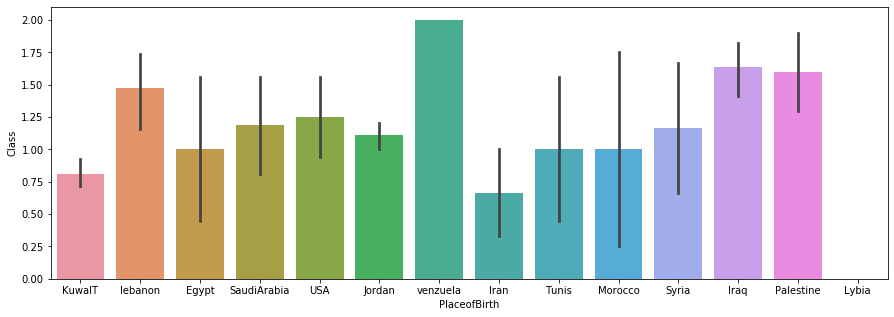

In [62]:
plt.figure(figsize = (15,5))
sns.barplot(df.PlaceofBirth, df.Class)

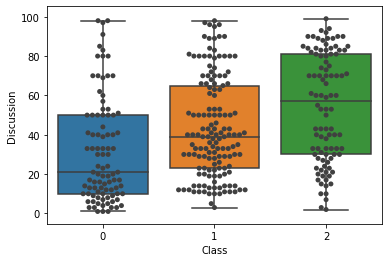

In [63]:
ax = sns.boxplot(x='Class', y='Discussion', data=train)
ax = sns.swarmplot(x='Class', y = 'Discussion', data=train, color='.25')
plt.show()

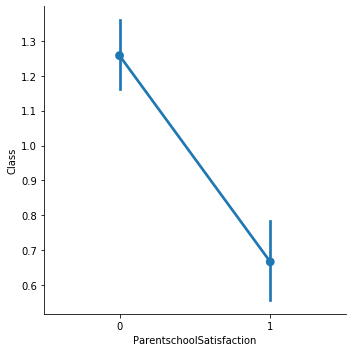

In [6]:
sns.catplot('ParentschoolSatisfaction','Class', kind='point', data=train) 

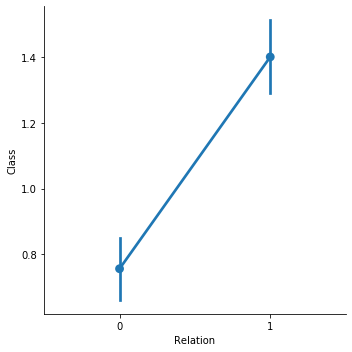

In [26]:
sns.catplot('Relation','Class', kind='point', data=train) 

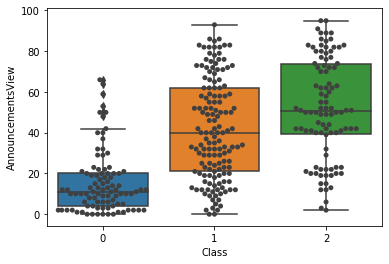

In [37]:
ax = sns.swarmplot(x='Class', y='AnnouncementsView', data=train, color='.25')
ax = sns.boxplot(x='Class', y='AnnouncementsView', data=train)
plt.show()

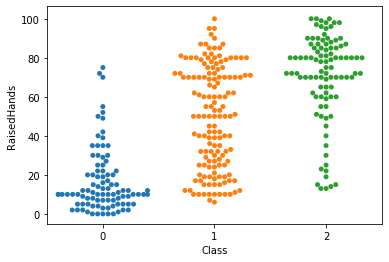

In [9]:
Raised_hand = sns.swarmplot(x="Class", y="RaisedHands", data=train)

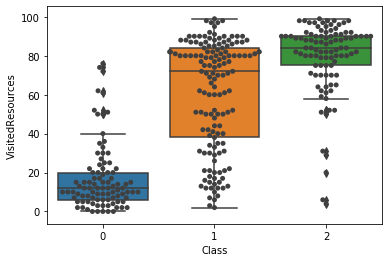

In [33]:
ax = sns.boxplot(x='Class', y='VisitedResources', data=train)
ax = sns.swarmplot(x='Class', y = 'VisitedResources', data=train, color='.25')
plt.show()

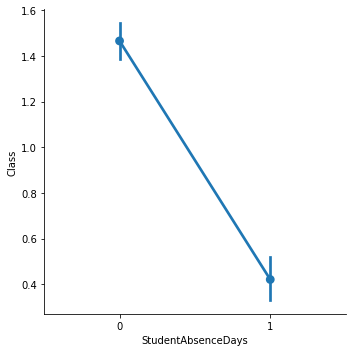

In [24]:
sns.catplot('StudentAbsenceDays','Class', kind='point', data=train) 

In [64]:
from sklearn import tree
target = train['Class'].values
features = train[["Gender", "Discussion", "ParentAnsweringSurvey", "ParentschoolSatisfaction", "Relation", "AnnouncementsView", "RaisedHands", "VisitedResources", "StudentAbsenceDays"]].values

tree_clsfr_ovrfit = tree.DecisionTreeClassifier('entropy')
tree_clsfr_ovrfit = tree_clsfr_ovrfit.fit(features, target)

print(tree_clsfr_ovrfit.feature_importances_)
print(tree_clsfr_ovrfit.score(features, target))

[0.03715021 0.11315495 0.02076733 0.00527404 0.03742832 0.14139181
 0.11504806 0.25814435 0.27164094]
1.0


In [76]:
tree_clsfr = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5, random_state = 1)
tree_clsfr = tree_clsfr.fit(features, target)

print(tree_clsfr.feature_importances_)
print(tree_clsfr.score(features, target))

[0.03030958 0.04857035 0.04230003 0.         0.07785674 0.08740402
 0.08083362 0.4029932  0.22973247]
0.8690476190476191


In [83]:
# Import the `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Building and fitting my forest
rnd_forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
rnd_forest = rnd_forest.fit(features, target)

print(rnd_forest.feature_importances_)

# Print the score of the fitted random forest
print(rnd_forest.score(features, target))

[0.02717139 0.12152595 0.04053674 0.0328018  0.05102875 0.13842387
 0.19296193 0.24598041 0.14956915]
0.9970238095238095


In [88]:
test_features = test[["Gender", "Discussion", "ParentAnsweringSurvey", "ParentschoolSatisfaction", "Relation", "AnnouncementsView", "RaisedHands", "VisitedResources", "StudentAbsenceDays"]].values
test_features

array([[ 1, 25,  1, ..., 20, 20,  0],
       [ 1, 30,  0, ..., 10,  7,  1],
       [ 1, 35,  0, ..., 30, 25,  1],
       ...,
       [ 0, 58,  1, ..., 80, 82,  0],
       [ 1, 70,  1, ..., 85, 88,  0],
       [ 0,  8,  0, ...,  2,  7,  1]])

In [84]:
tree_prediction = tree_clsfr.predict(test_features)
tree_solution = pd.DataFrame(tree_prediction, columns = ["Class"])

forest_prediction = rnd_forest.predict(test_features)
forest_solution = pd.DataFrame(forest_prediction, columns = ["Class"])

In [85]:
from sklearn.metrics import classification_report, accuracy_score
print('============= Decision Tree ==============')
print(classification_report(test["Class"], tree_prediction, target_names=['Low', 'Mid', 'High']))

print('============= Random Forest ==============')
print(classification_report(test["Class"], forest_prediction, target_names=['Low', 'Mid', 'High']))

============= Decision Tree ==============
              precision    recall  f1-score   support

         Low       0.79      0.76      0.78        34
         Mid       0.69      0.65      0.67        66
        High       0.65      0.73      0.69        44

    accuracy                           0.70       144
   macro avg       0.71      0.71      0.71       144
weighted avg       0.70      0.70      0.70       144

============= Random Forest ==============
              precision    recall  f1-score   support

         Low       0.88      0.82      0.85        34
         Mid       0.71      0.76      0.74        66
        High       0.71      0.68      0.70        44

    accuracy                           0.75       144
   macro avg       0.77      0.75      0.76       144
weighted avg       0.75      0.75      0.75       144



In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [5]:
data = pd.read_csv('../../Data/SAP_numeric.csv')
data.head()

# Y = data['Class'].values
# data2 = data.drop(['Class'],axis=1)
# x = data2.values

x, Y = data.drop('Class', axis=1), np.asarray(data['Class'])
Xtrain, Xtest, ytrain, ytest = train_test_split(x, Y, test_size=0.20)

In [6]:
classifiers = [('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
               ('GaussianNB', GaussianNB()),
               ('BernoulliNB', BernoulliNB())
              ]

allscores = []


BernoulliNB Mean accuracy 0.69 and mean f1_score 0.70 after 20 Iteration

GaussianNB Mean accuracy 0.75 and mean f1_score 0.76 after 20 Iteration

DecisionTreeClassifier Mean accuracy 0.70 and mean f1_score 0.70 after 20 Iteration

AdaBoostClassifier Mean accuracy 0.70 and mean f1_score 0.72 after 20 Iteration

/home/galiold/Projects/University/Datamining-Fall2019/FirstPhase/venv/lib/python3.6/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[None, None, None, None, None, None, None, None]

<Figure size 1080x720 with 0 Axes>

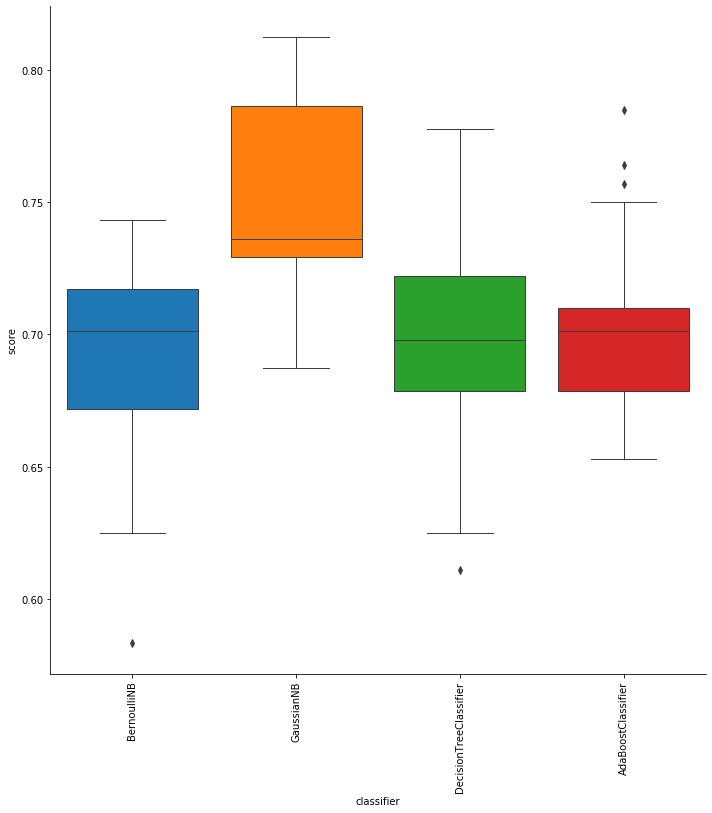

In [7]:
data = pd.read_csv('../../Data/SAP_numeric.csv')
data.head()

classifiers = [('BernoulliNB', BernoulliNB()), 
               ('GaussianNB', GaussianNB()),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('AdaBoostClassifier', AdaBoostClassifier())
              ]

allscores = []

for name, classifier in classifiers:
    accuracy=  0.0
    f1_total = np.array([])
    scores = np.array([])
    for i in range(20):
        x, Y = data.drop('Class', axis=1), np.asarray(data['Class'])
        Xtrain, Xtest, ytrain, ytest = train_test_split(x, Y, test_size=0.30)

        scaler = StandardScaler()
        Xtrain_scaled = scaler.fit_transform(Xtrain)
        Xtest_scaled = scaler.transform(Xtest)
        #Calculate the class prior probabilities for each continent
        classifier.fit(Xtrain_scaled, ytrain)
        #Make a prediction for the test data
        ypred = classifier.predict(Xtest_scaled)
        #Calculate the accuracy of the data
        scores = np.append(scores, accuracy_score(ytest, ypred))
        accuracy = accuracy + accuracy_score(ytest, ypred)
        f1_total = np.append(f1_total, np.average(f1_score(ytest, ypred, average=None)))

    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)
    accuracy_avg = accuracy / 20
    f1_avg = np.average(f1_total)
    print(name+" Mean accuracy %.2f and mean f1_score %.2f after 20 Iteration\n" % (accuracy_avg, f1_avg))
    
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.figure(figsize=(15,10))
sns.catplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               size = 10)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [123]:
svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(Xtrain, ytrain)

ypred = svm.predict(Xtest)
print('Misclassified samples: %d' % (ytest != ypred).sum())
print('Accuracy: %.2f' % accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Misclassified samples: 39
Accuracy: 0.73
              precision    recall  f1-score   support

           1       0.71      0.74      0.73        47
           2       0.91      0.73      0.81        41
           3       0.65      0.71      0.68        56

    accuracy                           0.73       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.74      0.73      0.73       144



In [20]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [90]:
df = pd.read_csv('../../Data/SAP_numeric.csv')

In [23]:
df.head()
print(df.shape)
df.isnull().sum()

(480, 18)


Unnamed: 0                  0
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

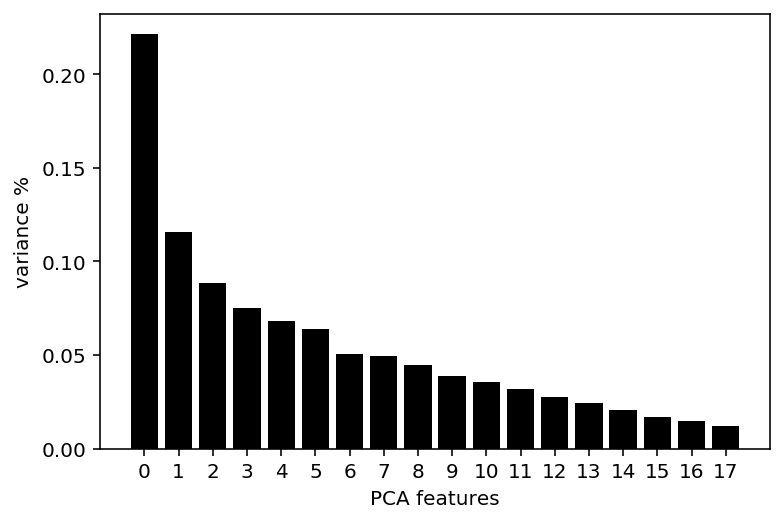

In [84]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'# Load in the data
df = pd.read_csv('../../Data/SAP_numeric.csv')# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)# Create a PCA instance: pca
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(X_std)# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

NameError: name 'PCA_components' is not defined

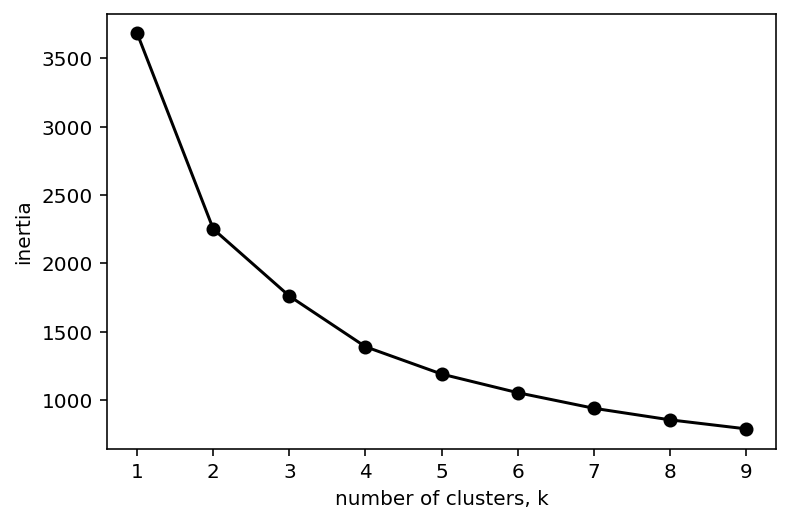

In [92]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [97]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(PCA_components)

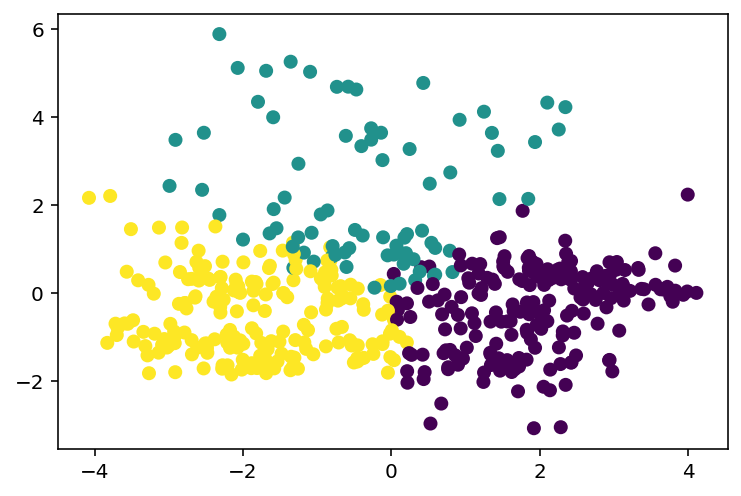

In [98]:
plt.scatter(PCA_components[0], PCA_components[1],c=y_kmeans3)

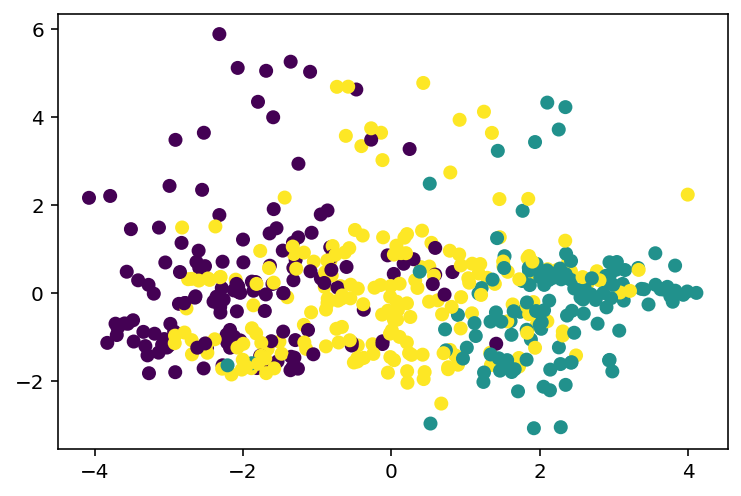

In [104]:
plt.scatter(PCA_components[0], PCA_components[1],c=df["Class"])


In [103]:
df["Class"]

0      3
1      3
2      2
3      2
4      3
      ..
475    2
476    3
477    3
478    2
479    2
Name: Class, Length: 480, dtype: int64